 # MOVIE RECOMMENDATION ENGINE


**MOVIE RECOMMENDATION ENGINE** : A Engine which will recommend best movie to the user

Importing library files
1. Pandas
1. Numpy
1. Matplotlib
1. Seaborn

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset through pandas library**

In [2]:
movies=pd.read_csv('movies.csv')  # movies data
ratings= pd.read_csv('ratings.csv')  # ratings data
movies.head(2) # movies dataset visualization

movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy

In [3]:
ratings.head(2)  # ratings dataset visualization

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247

**Find all types of  unique movie genres**

In [4]:
movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

**Find all types of unique ratings of movies**

In [5]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**Find all types of unique movie titles**

In [6]:
movies['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

**Countplot of user ratings**

<AxesSubplot:xlabel='rating', ylabel='count'>

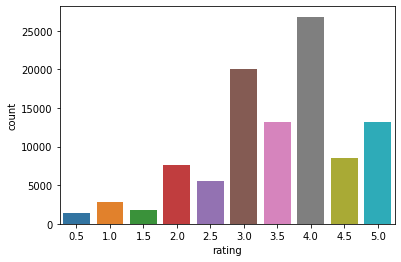

In [7]:
sns.countplot(ratings['rating'])

Pie Plot of Movies ratings

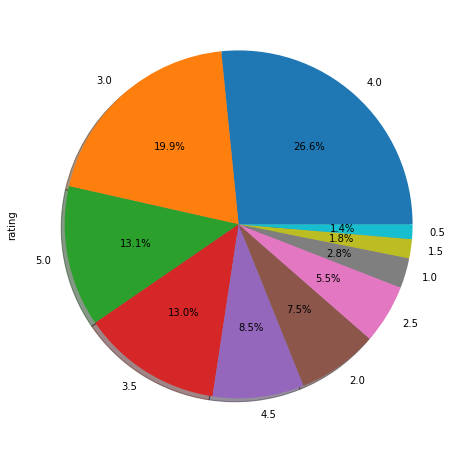

In [8]:
plt.figure(figsize=(10,8))
ratings['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [9]:
ratings=ratings[['userId','movieId','rating']] #separate columns from timestamp column
ratings_df=ratings.groupby(['userId','movieId']).agg(np.max) #Groupby data
ratings_df.head()

rating
userId movieId        
1      1           4.0
       3           4.0
       6           4.0
       47          5.0
       50          5.0

**On the above, groupby data based on : Each user viewed which movies and how much rated for those movies.
userid 1 viewed movie ids 1,3,6,47,50 ans so on and gave individual rating for each movie.**

In [10]:
count_ratings=ratings.groupby('rating').count() #count all ratings
count_ratings

userId  movieId
rating                 
0.5       1370     1370
1.0       2811     2811
1.5       1791     1791
2.0       7551     7551
2.5       5550     5550
3.0      20047    20047
3.5      13136    13136
4.0      26818    26818
4.5       8551     8551
5.0      13211    13211

In [11]:
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),
                                  1)
count_ratings

userId  movieId  perc_total
rating                             
0.5       1370     1370         1.4
1.0       2811     2811         2.8
1.5       1791     1791         1.8
2.0       7551     7551         7.5
2.5       5550     5550         5.5
3.0      20047    20047        19.9
3.5      13136    13136        13.0
4.0      26818    26818        26.6
4.5       8551     8551         8.5
5.0      13211    13211        13.1

**On the above predict the percentage for each ratings. 
1. ratings 5.0 got 13.1 %
1. ratings 4.5 got 8.5 %
1. ratings 4.0 got 26.6 %
1. ratings 3.5 got 13.0 %
1. ratings 3.0 got 19.9 %
1. ratings 2.5 got 5.5 %
1. ratings 2.0 got 7.5 %
1. ratings 1.5 got 1.8 %
1. ratings 1.0 got 2.8 %
1. ratings 0.5 got 1.4 %
Highest rating is 4.0 and Lowest rating is 1.4 &**

<AxesSubplot:ylabel='perc_total'>

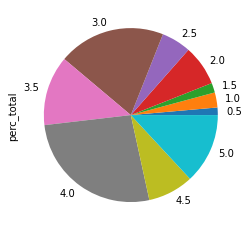

In [12]:
# PLotting of each ratings
count_ratings['perc_total'].plot.pie()  #pie plot

<AxesSubplot:xlabel='rating'>

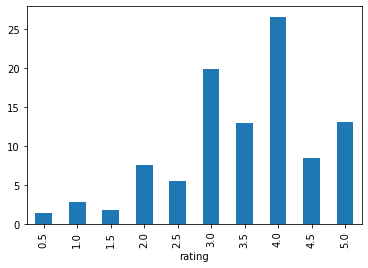

In [13]:
count_ratings['perc_total'].plot.bar()  # bar plot

In [14]:
genres=movies['genres']
genres.head()  # visualization of genres column from movie dataset

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [15]:
genre_list=" "
for index,row in movies.iterrows():
    genre_list+=row.genres+"|"
genre_list_split=genre_list.split("|")
new_list=list(set(genre_list_split))
new_list.remove('')
new_list

['War',
 'Mystery',
 ' Adventure',
 'Film-Noir',
 'Western',
 'Crime',
 'Animation',
 'Adventure',
 'Children',
 'Comedy',
 'Documentary',
 'Romance',
 'Action',
 '(no genres listed)',
 'Sci-Fi',
 'IMAX',
 'Musical',
 'Fantasy',
 'Drama',
 'Thriller',
 'Horror']

**On the above split the all movie genres from the dataset and used "set" data structure for non duplication of genres in the same. 
If in the column "|" finds, it will separate the genres of movies and remove the duplication in the same by using "set" data structure.**

In [16]:
m=movies.copy() #make a copy of movies dataset

In [17]:
for genre in new_list:
    m[genre]=m.apply(lambda _:int(genre in _.genres),axis=1)
m.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  War  Mystery   Adventure  \
0  Adventure|Animation|Children|Comedy|Fantasy    0        0           0   
1                   Adventure|Children|Fantasy    0        0           0   
2                               Comedy|Romance    0        0           0   
3                         Comedy|Drama|Romance    0        0           0   
4                                       Comedy    0        0           0   

   Film-Noir  Western  Crime  Animation  ...  Romance  Action  \
0          0        0      0          1  ...        0       0   
1          0        0      0          0  ...        0       0   
2          0        0      0          0  ...        1       0   
3          0        0      0          0  ...        1       0   
4          0        0      0          0  ...        0       0   

   (no genres listed)  Sci-Fi  IMAX  Musical  Fantasy  Drama  Thriller  Horror  
0                   0       0     0        0        1      0         0       0  
1                   0       0     0        0        1      0         0       0  
2                   0       0     0        0        0      0         0       0  
3                   0       0     0        0        0      1         0       0  
4                   0       0     0        0        0      0         0       0  

[5 rows x 24 columns]

**Make a Data with title of the movie and genre of the data. If the genre of the movie matches the entire column then it shows 1.
Like movie id 3 whose title is Grumpier Old Men(1995) and genre is Comedy|Romance. This movies genre matches the Romance column very much. '...' indicates there are few columns.**

In [18]:
avg=pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg # make a dataframe for each movie id with its corresponding ratings mean and count

mean  count
movieId                 
1        3.920930    215
2        3.431818    110
3        3.259615     52
4        2.357143      7
5        3.071429     49
...           ...    ...
193581   4.000000      1
193583   3.500000      1
193585   3.500000      1
193587   3.500000      1
193609   4.000000      1

[9724 rows x 2 columns]

In [19]:
avg['movieId']=avg.index
avg # add the movieid column

mean  count  movieId
movieId                          
1        3.920930    215        1
2        3.431818    110        2
3        3.259615     52        3
4        2.357143      7        4
5        3.071429     49        5
...           ...    ...      ...
193581   4.000000      1   193581
193583   3.500000      1   193583
193585   3.500000      1   193585
193587   3.500000      1   193587
193609   4.000000      1   193609

[9724 rows x 3 columns]

In [20]:
np.percentile(avg['count'],70)

7.0

**On the above 70 % movie has average count 7**

In [21]:
np.percentile(avg['count'],50)

3.0

**On the above 50 % movie has average count 3**

In [22]:
idx2title={int(row['movieId']):row['title']
          for _,row in movies.iterrows()}
idx2title

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

**On the above display the all movie titles arranged one after the another**

In [23]:
title2idx={j:i for i,j in idx2title.items()}
title2idx

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)':

**On the above display the all movie titles arranged one after the another in reverse order**

In [24]:
highratings=ratings[ratings.rating>=4]
highratings

userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100830     610   166528     4.0
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0

[48580 rows x 3 columns]

**Display the movie data whose ratings is greater than or equal to 4**

In [25]:
itemsets=[[idx2title[mov] for mov in highratings[highratings.userId==user].movieId]
         for user in highratings.userId]
itemsets

[['Toy Story (1995)',
  'Grumpier Old Men (1995)',
  'Heat (1995)',
  'Seven (a.k.a. Se7en) (1995)',
  'Usual Suspects, The (1995)',
  'Bottle Rocket (1996)',
  'Braveheart (1995)',
  'Rob Roy (1995)',
  'Canadian Bacon (1995)',
  'Desperado (1995)',
  'Billy Madison (1995)',
  'Dumb & Dumber (Dumb and Dumber) (1994)',
  'Ed Wood (1994)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Forrest Gump (1994)',
  'Jungle Book, The (1994)',
  'Mask, The (1994)',
  'Dazed and Confused (1993)',
  'Fugitive, The (1993)',
  'Jurassic Park (1993)',
  "Schindler's List (1993)",
  'So I Married an Axe Murderer (1993)',
  'Three Musketeers, The (1993)',
  'Tombstone (1993)',
  'Dances with Wolves (1990)',
  'Batman (1989)',
  'Silence of the Lambs, The (1991)',
  'Pinocchio (1940)',
  'Fargo (1996)',
  'James and the Giant Peach (1996)',
  'Rock, The (1996)',
  "She's the One (1996)",
  'Wizard of Oz, The (1939)',
  'Citizen Kane (1941)',

**On the above display all movie names whose rating is greater than or equal to 4.0**

# Recommendation Engine making starts here


**Recommendation engine will be made by using Apriori algorithm which is very much popular algorithm for Association Rule Mining.**

In [26]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
tr_ary=te.fit(itemsets).transform(itemsets)
DF=pd.DataFrame(tr_ary,columns=te.columns_)
DF.head()

'71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Salem's Lot (2004)  \
0       False                                    False                False   
1       False                                    False                False   
2       False                                    False                False   
3       False                                    False                False   
4       False                                    False                False   

   'Til There Was You (1997)  'burbs, The (1989)  (500) Days of Summer (2009)  \
0                      False               False                        False   
1                      False               False                        False   
2                      False               False                        False   
3                      False               False                        False   
4                      False               False                        False   

   *batteries not included (1987)  ...And Justice for All (1979)  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   00 Schneider - Jagd auf Nihil Baxter (1994)  1-900 (06) (1994)  ...  \
0                                        False              False  ...   
1                                        False              False  ...   
2                                        False              False  ...   
3                                        False              False  ...   
4                                        False              False  ...   

   Zombieland (2009)  Zookeeper (2011)  Zoolander (2001)  Zootopia (2016)  \
0              False             False             False            False   
1              False             False             False            False   
2              False             False             False            False   
3              False             False             False            False   
4              False             False             False            False   

   Zulu (1964)  [REC] (2007)  [REC]² (2009)  eXistenZ (1999)  xXx (2002)  \
0        False         False          False            False       False   
1        False         False          False            False       False   
2        False         False          False            False       False   
3        False         False          False            False       False   
4        False         False          False            False       False   

   ¡Three Amigos! (1986)  
0                   True  
1                   True  
2                   True  
3                   True  
4                   True  

[5 rows x 6297 columns]

**On the above rows has been converted into columns and columns has been converted into rows.
Movie does not rated is False and rated is True.**

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules
f=apriori(DF, min_support=0.2, use_colnames=True, max_len=2)
rules=association_rules(f,metric='lift',min_threshold=2)
rules.head()

antecedents  \
0                              (Blade Runner (1982))   
1                     (2001: A Space Odyssey (1968))   
2  (Dr. Strangelove or: How I Learned to Stop Wor...   
3                     (2001: A Space Odyssey (1968))   
4                                   (Aladdin (1992))   

                                         consequents  antecedent support  \
0                     (2001: A Space Odyssey (1968))            0.336414   
1                              (Blade Runner (1982))            0.333059   
2                     (2001: A Space Odyssey (1968))            0.319926   
3  (Dr. Strangelove or: How I Learned to Stop Wor...            0.333059   
4                            (Lion King, The (1994))            0.332565   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.333059  0.240243    0.714128  2.144151  0.128197    2.333009  
1            0.336414  0.240243    0.721323  2.144151  0.128197    2.381197  
2            0.333059  0.218979    0.684468  2.055096  0.112425    2.113703  
3            0.319926  0.218979    0.657478  2.055096  0.112425    1.985492  
4            0.331083  0.232462    0.698997  2.111246  0.122355    2.222296

**On the above, the movie has been recommended to use user where 'antecedents' is the movie column and 'consequents' is the recommended movie column.
In the first row if the see the '(2001:A Space Odyssey(1968))' movie then '(Blade Runner(1982))' will be recommended to you for further view and whose confience of the view is 72 % approximately.
Lift column is used for to tell us likelihood of watching both movies together is 2.144151 times more than the likelihood of just watching one movie.
Support is the default popularity of an item. In mathematical terms the support of one item is nothing but the ratio of transactions involving one item to the total number of transactions. 
support(movie_1)=(All transactions involving movie_1)/(total transactions)
Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y.
Threshold in the Apriori algorithm identifies the item sets which are subsets of at least as each transaction is seen as a set of items.**